<a href="https://colab.research.google.com/github/teazaw/MAT421-Applied-Computational-Methods/blob/main/MAT421_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Interpolation and Interpolation Problem Statement**
In mathematics, **interpolation** is a method of constructing new data points based on the range of a set of known data points. There are several types of interpolation, including:

1. Linear
2. Exponential
3. Spline
4. Polynomial

If we have a data set consisting of independent data values, *x*, and dependent data values, *yi* , where *i=1, ..., n* , we would like to find an estimation function that goes through our data points. Given a new *x**, we can interpolate its function value using an interpolation function. The following figure shows the **interpolation problem statement**.


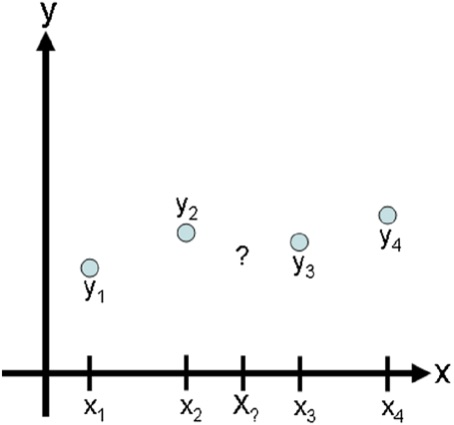

# **Linear Interpolation**
**Linear interpolation** is a type of interpolation that uses linear polynomials to create new data points between known data points. The estimated point is assumed to lie on the line joining the nearest points to the left and right. The formula for linear interpolation is:

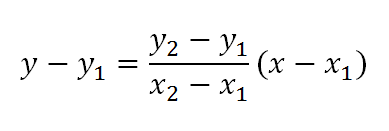

For example, if you have two points, (1,2) and (3,6), and you want to find the value of *y* when *x* =2, you can use the formula.

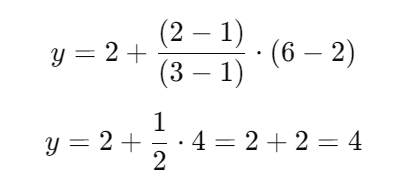

Therefore, *y* = 4 when *x* = 2.
The coding example below uses linear interpolation to determine the *y* at a certain *x*.

Interpolated value at x = 3: y = 7.5


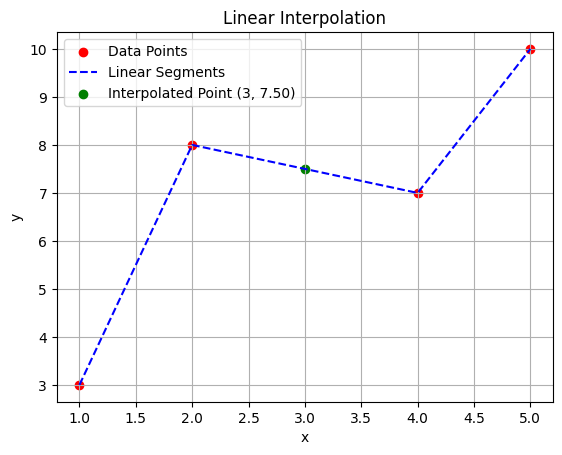

In [6]:
import numpy as np
import matplotlib.pyplot as plt


x = np.array([1, 2, 4, 5])  # x values
y = np.array([3, 8, 7, 10])  # y values

# interpolation function
def linear_interpolate(x_points, y_points, x_new):
    for i in range(len(x_points) - 1):
        if x_points[i] <= x_new <= x_points[i + 1]:
            y_new = y_points[i] + (x_new - x_points[i]) * (y_points[i + 1] - y_points[i]) / (x_points[i + 1] - x_points[i])
            return y_new
    return None


x_interp = 3  #value to interpolate
y_interp = linear_interpolate(x, y, x_interp)
print(f"Interpolated value at x = {x_interp}: y = {y_interp}")

plt.scatter(x, y, color='red', label='Data Points')
plt.plot(x, y, linestyle='--', color='blue', label='Linear Segments')
plt.scatter(x_interp, y_interp, color='green', label=f'Interpolated Point ({x_interp}, {y_interp:.2f})')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Interpolation')
plt.legend()
plt.grid()
plt.show()


# **Cubic Spline Interpolation**
**Cubic spline interpolation** is a method of interpolating data points using piecewise cubic polynomials. This creates smooth curves between points. For example, consider the problem below.

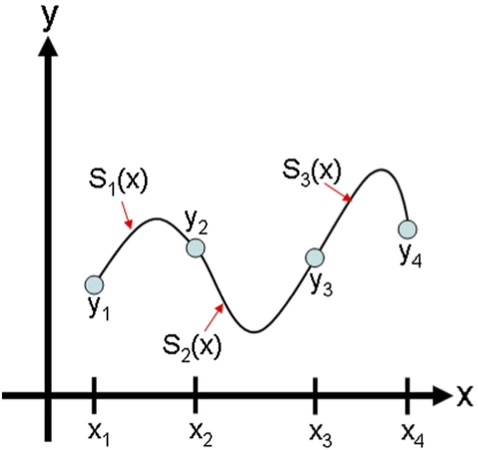

The cubic functions must intersect the data points on the left and right.

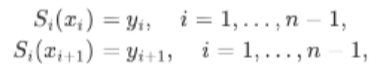

This gives us 2 (*n*-1) equations. We want each cubic function to join as smoothly with its neightbors as possible, so we constrain the splines to have continuous first and second derivatives at the data points *i* = 2, ..., *n* - 1.

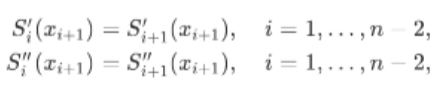

Two more equations are required to compute the coefficients of *Si(x)*.

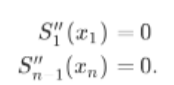

The following example uses cubic spline interpolation to generate interpolated values for 100 equally spaced *x* values.

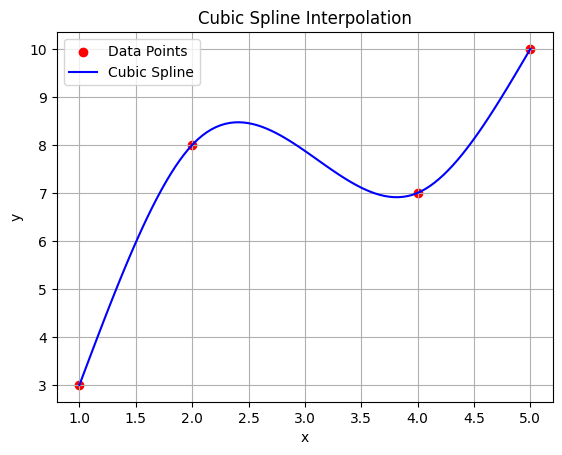

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

#given values
x = np.array([1, 2, 4, 5])
y = np.array([3, 8, 7, 10])


cs = CubicSpline(x, y, bc_type='natural')

# new x values for interpolation
x_new = np.linspace(min(x), max(x), 100)
y_new = cs(x_new)


plt.scatter(x, y, color='red', label='Data Points')  # Original points
plt.plot(x_new, y_new, color='blue', label='Cubic Spline')  # Spline curve
plt.xlabel('x')
plt.ylabel('y')
plt.title('Cubic Spline Interpolation')
plt.legend()
plt.grid()
plt.show()
